<a href="https://colab.research.google.com/github/sara692/Foundations-of-Deep-Learning_-Neural-Networks-Optimization-and-Regularization/blob/main/Foundations_of_Deep_Learning__Neural_Networks%2C_Optimization%2C_and_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
This notebook serves as a comprehensive learning module that combines hands-on coding, conceptual insights, and structured student tasks. The flow mirrors a real deep learning workflow—from loading data and building models to understanding optimization, regularization, and model behavior.

The notebook is organized into **three major sections**, each designed to progressively deepen the learner's understanding of neural networks and training dynamics.


## Section 1 — Practical Part #1: Building & Training a Neural Network

### **What this section covers:**
- Loading and preprocessing the MNIST dataset
- Flattening image data for fully connected networks
- Building a neural network with:
  - Input layer (Flatten)
  - Hidden Dense layer (ReLU activation)
  - Output layer (Softmax activation)
- Compiling the model using the **Adam optimizer**
- Training the model and monitoring training/validation loss
- Predicting and visualizing test samples

### **Learning Outcome:**
Students gain a practical understanding of how forward and backward passes operate within a simple neural network.

[mnist dataset Link](https://datasets.activeloop.ai/docs/ml/datasets/mnist/)
---


In [ ]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train ,  x_test = x_train / 255.0 , x_test/255.0

In [ ]:
len(x_train)

60000

In [ ]:
x_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

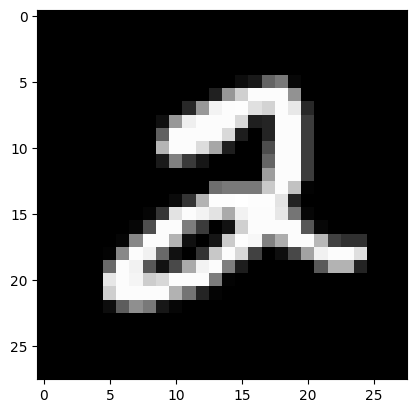

In [ ]:
plt.imshow(x_train[5], cmap = "gray")

In [ ]:
model= keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)), # input layer > 2D to 1D
  # 64 128 256
  keras.layers.Dense(128, activation="relu"), # hidden layer 1

  keras.layers.Dense(10, activation= "softmax" ) # output layer
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# adam Adaptive Moment Estimation (RMSporb+ Momenmtum) > Optimizer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#train validation test

In [ ]:
history = model.fit(x_train,y_train ,epochs = 5 ,validation_data=(x_test, y_test) ) # train ,  test

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8807 - loss: 0.4264 - val_accuracy: 0.9563 - val_loss: 0.1485
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9653 - loss: 0.1165 - val_accuracy: 0.9700 - val_loss: 0.0945
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9778 - loss: 0.0759 - val_accuracy: 0.9747 - val_loss: 0.0837
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9826 - loss: 0.0574 - val_accuracy: 0.9746 - val_loss: 0.0817
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9878 - loss: 0.0413 - val_accuracy: 0.9772 - val_loss: 0.0751


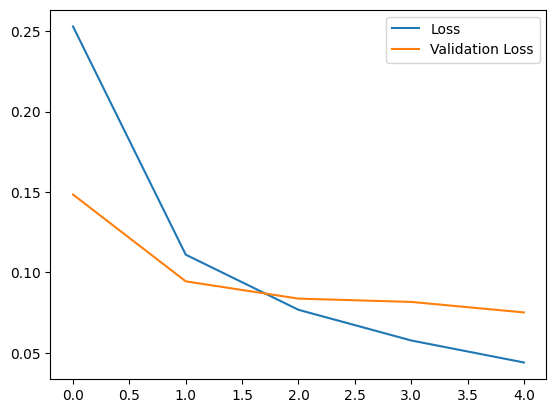

In [ ]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
prediction = model.predict(x_test[14].reshape(1, 28, 28))  # 10 pred
print("Prediction:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Prediction: 1


In [ ]:
prediction

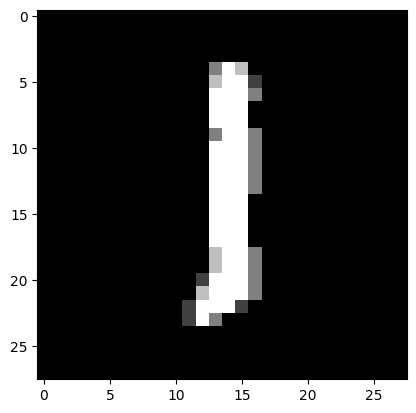

In [ ]:
plt.imshow(x_test[14], cmap = "gray")

## Section 2 — Practical Part #2: Data Splitting, Regularization & Early Stopping

### **Key Concepts Introduced:**
#### **1. Proper Dataset Splitting**
**General Idea**

- **Training set**: The model learns from this data.  
- **Validation set**: Used during training to tune hyperparameters and prevent overfitting.  
- **Test set**: Kept aside until the very end to measure the model’s *true performance* on completely unseen data.  

**Important Note**:  
If you use `x_test` directly as your validation set, this is a mistake.  
Why? Because you will end up tuning your model on the same data that you later claim to be your “unseen test set,” which makes the final evaluation biased.  

The correct workflow:
1. Split the dataset into **train + test** (e.g., 80% train, 20% test).  
2. From the **train** portion, further split into **train + validation** (e.g., 70% train, 10% validation, 20% test).  
3. Use the **validation set** only for model tuning.  
4. Use the **test set** once at the end for the final unbiased performance check.

#### **2. Regularization Techniques**
- Adding **Dropout** layers to reduce overfitting
- Using **EarlyStopping** to detect convergence and stop training

#### **3. Improved Model Pipeline**
- Training over more epochs
- Monitoring training vs. validation performance
- Evaluating on the final test set
- Predicting and analyzing results

### **Learning Outcome:**
Students understand how model generalization is improved using splitting, dropout, and early stopping.

---


In [3]:
# 1) Load Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values (0-255 -> 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 2) Split Validation Set from Training Set
# Reserve last 5000 samples for validation
x_val = x_train[-5000:]
y_val = y_train[-5000:]

x_tr = x_train[:-5000]
y_tr = y_train[:-5000]
print("Train shape:", x_tr.shape)
print("Validation shape:", x_val.shape)
print("Test shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (55000, 28, 28)
Validation shape: (5000, 28, 28)
Test shape: (10000, 28, 28)


In [ ]:

# 3) Build Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:

# 5) Train with Validation Set
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9622 - loss: 0.1270 - val_accuracy: 0.9732 - val_loss: 0.0867
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9722 - loss: 0.0907 - val_accuracy: 0.9762 - val_loss: 0.0778
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9772 - loss: 0.0728 - val_accuracy: 0.9786 - val_loss: 0.0719
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9822 - loss: 0.0583 - val_accuracy: 0.9780 - val_loss: 0.0714
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9840 - loss: 0.0501 - val_accuracy: 0.9798 - val_loss: 0.0686
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9869 - loss: 0.0423 - val_accuracy: 0.9814 - val_loss: 0.0671
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9888 - loss: 0.0343 - val_accuracy: 0.9794 - val_loss: 0.0706
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9909 - loss: 0.0288

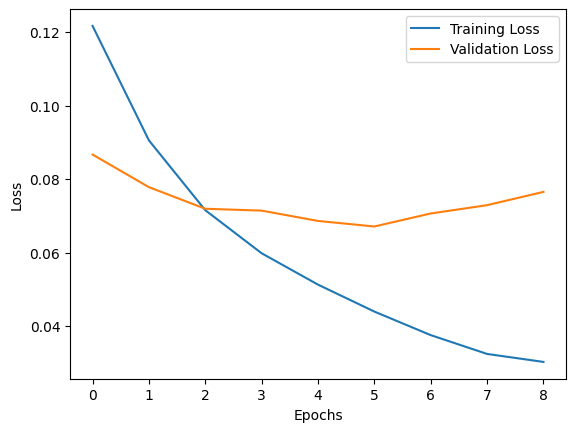

In [ ]:

# 6) Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# 7) Evaluate on Test Set
print("Final evaluation on test data:")
model.evaluate(x_test, y_test)

Final evaluation on test data:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.0869


[0.0718052089214325, 0.9783999919891357]

In [ ]:
# 8) Predict Example
sample = x_test[13].reshape(1, 28, 28)
pred = model.predict(sample)
print("Predicted Label:", np.argmax(pred))
print("True Label:", y_test[13])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted Label: 0
True Label: 0


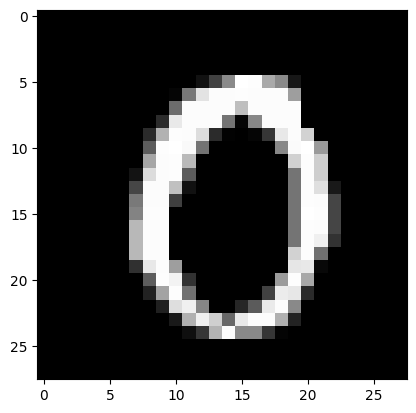

In [ ]:
plt.imshow(x_test[13], cmap="gray")
plt.show()

## Section 3 — Student Tasks: Deep Learning Mastery

This section turns theory and practice into structured exploration. Students investigate predictions, optimization behavior, regularization strength, and architectural effects.
### **Task Categories:**

#### **1. Prediction Behavior & Analysis**
- Explain correct and incorrect predictions
- Connect outputs to internal neural network operations

#### **2. Training Dynamics & Loss Curves**
- Compare different epoch lengths
- Interpret overfitting and underfitting signals

#### **3. Regularization Experiments**
- Dropout ablation (0%, 10%, 30%)
- L2 weight decay tuning
- EarlyStopping behavior interpretation

#### **4. Optimizer Comparison**
- SGD
- SGD with Momentum
- Adam
- AdamW
Students analyze convergence speed, stability, and gradients.

#### **5. Architecture & Activation Function Variants**
- Replace ReLU with Tanh, Softsign, or GELU
- Discuss gradient flow differences
- Explain why ReLU dominates MLPs and why GELU is favored in Transformers

#### **6. Weight Inspection & Model Capacity**
- Examine dense layer weights
- Connect parameter count to overfitting risk
- Explain how regularization mitigates capacity issues


---

## Part 1 — Core Model Understanding & Prediction Behavior

### **Task 1 — Deep Prediction Analysis**
Select **three samples** from `x_test` and:

1. Run `model.predict(...)` on each sample.  
2. Print the **Predicted Label** and **True Label**.  
3. Provide a conceptual explanation of the result by referencing:
   - How the forward pass transforms inputs through layers.  
   - The role of activation functions (ReLU, Softmax).  
   - How the optimizer (Adam) may have shaped weight updates during training.

The objective is not to simply report results, but to analyze *why* the model predicted correctly or incorrectly.

---

### **Task 2 — Custom Image Generalization Test**
Create a handwritten digit using a drawing tool and load it into the model. After preprocessing (grayscale, resizing to 28×28, normalization), run prediction and analyze:

- Did the model correctly classify the digit?  
- If not, why? Consider distribution shift, noise, or lack of augmentation.  
- How does this relate to representation learning in neural networks?

---

### **Task 3 — Epoch-Based Learning Curve Exploration**
Train the model with:
- 5 epochs  
- 10 epochs  
- 20 epochs

For each run:
1. Plot **loss vs. val_loss** and **accuracy vs. val_accuracy**.  
2. Identify signs of overfitting.  
3. Explain how the optimizer (Adam) influenced the speed and stability of convergence.

The focus is on understanding training dynamics.

---

### **Task 4 — EarlyStopping Behavior Analysis**
Enable EarlyStopping with:
```python
keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
```
Analyze:

1. At which epoch did training stop?  
2. Why does the validation loss control this decision?  
3. What happens if you increase patience (e.g., to 5)?  
4. Would a different optimizer (e.g., SGD) change the EarlyStopping pattern?  
5. Explain how EarlyStopping acts as an indirect form of regularization.

---

### **Task 1 — Deep Prediction Analysis**
Select **three samples** from `x_test` and:

1. Run `model.predict(...)` on each sample.  
2. Print the **Predicted Label** and **True Label**.  
3. Provide a conceptual explanation of the result by referencing:
   - How the forward pass transforms inputs through layers.  
   - The role of activation functions (ReLU, Softmax).  
   - How the optimizer (Adam) may have shaped weight updates during training.


In [ ]:
indices = [1000, 1300, 1500]   # choose any 3 test samples

for i in indices:
    sample = x_test[i].reshape(1, 28, 28)
    pred = model.predict(sample, verbose=0)

    print(f"Sample index: {i}")
    print("Predicted Label:", np.argmax(pred))
    print("True Label:", y_test[i])
    print("-" * 30)

Sample index: 1000
Predicted Label: 9
True Label: 9
------------------------------
Sample index: 1300
Predicted Label: 4
True Label: 4
------------------------------
Sample index: 1500
Predicted Label: 1
True Label: 7
------------------------------


### **Task 2 — Custom Image Generalization Test**
Create a handwritten digit using a drawing tool and load it into the model. After preprocessing (grayscale, resizing to 28×28, normalization), run prediction and analyze:

- Did the model correctly classify the digit?  
- If not, why? Consider distribution shift, noise, or lack of augmentation.  
- How does this relate to representation learning in neural networks?


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

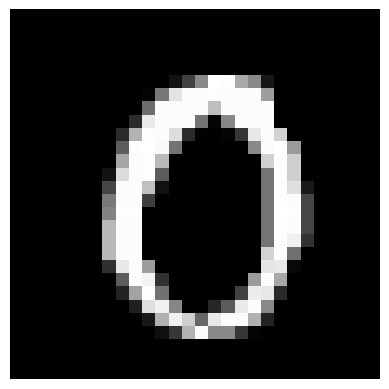

In [ ]:
#Create a handwritten digit using a drawing tool and load it into the model. After preprocessing (grayscale, resizing to 28×28, normalization), run prediction and analyze:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread("image8.PNG", cv2.IMREAD_GRAYSCALE)

# Resize to 28x28
img = cv2.resize(img, (28, 28))

# Normalize pixel values (0–1)
img = img / 255.0

# Reshape for model input
img = img.reshape(1, 28, 28)

# Visualize the processed image
plt.imshow(img.reshape(28, 28), cmap="gray")
plt.axis("off")


Predicted Label: 0
------------------------------


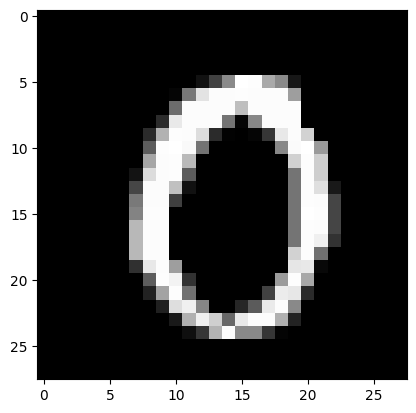

In [ ]:
pred = model.predict(img, verbose=0)
print("Predicted Label:", np.argmax(pred))
#print("True Label:", img)
print("-" * 30)

plt.imshow(img.reshape(28, 28), cmap="gray")

### **Task 3 — Epoch-Based Learning Curve Exploration**
Train the model with:
- 5 epochs  
- 10 epochs  
- 20 epochs

For each run:
1. Plot **loss vs. val_loss** and **accuracy vs. val_accuracy**.  
2. Identify signs of overfitting.  
3. Explain how the optimizer (Adam) influenced the speed and stability of convergence.

The focus is on understanding training dynamics.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8594 - loss: 0.4798 - val_accuracy: 0.9690 - val_loss: 0.1192
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9598 - loss: 0.1344 - val_accuracy: 0.9722 - val_loss: 0.0951
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9715 - loss: 0.0928 - val_accuracy: 0.9776 - val_loss: 0.0741
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9780 - loss: 0.0712 - val_accuracy: 0.9786 - val_loss: 0.0760
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9829 - loss: 0.0558 - val_accuracy: 0.9792 - val_loss: 0.0760


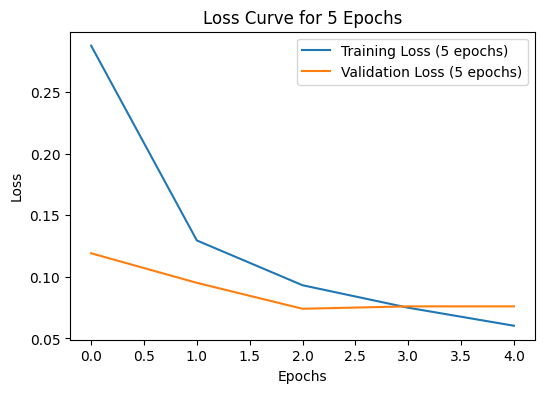

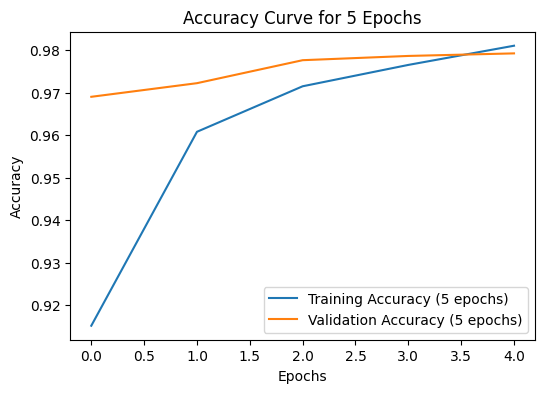

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8604 - loss: 0.4844 - val_accuracy: 0.9668 - val_loss: 0.1275
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9572 - loss: 0.1487 - val_accuracy: 0.9774 - val_loss: 0.0871
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9707 - loss: 0.0994 - val_accuracy: 0.9790 - val_loss: 0.0798
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9766 - loss: 0.0737 - val_accuracy: 0.9784 - val_loss: 0.0749
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9824 - loss: 0.0579 - val_accuracy: 0.9782 - val_loss: 0.0750
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9854 - loss: 0.0470 - val_accuracy: 0.9822 - val_loss: 0.0669
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9852 - loss: 0.0453 - val_accuracy: 0.9814 - val_loss: 0.0716
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9878 - loss: 0.038

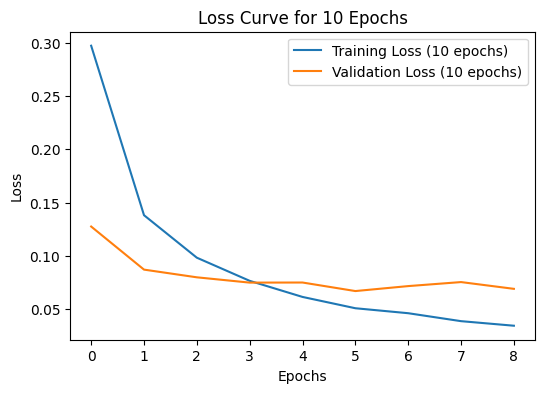

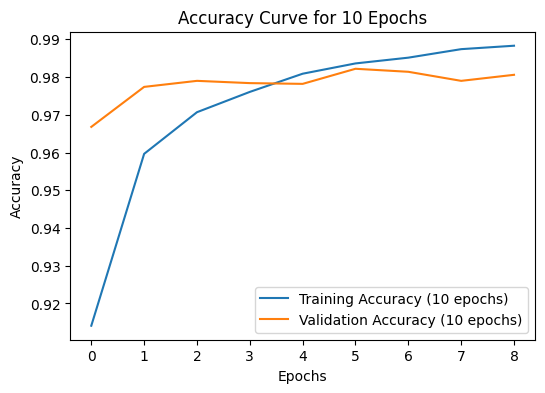

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8628 - loss: 0.4833 - val_accuracy: 0.9710 - val_loss: 0.1139
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9569 - loss: 0.1439 - val_accuracy: 0.9718 - val_loss: 0.0959
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9698 - loss: 0.0997 - val_accuracy: 0.9768 - val_loss: 0.0801
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9776 - loss: 0.0753 - val_accuracy: 0.9764 - val_loss: 0.0773
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9794 - loss: 0.0613 - val_accuracy: 0.9788 - val_loss: 0.0727
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9845 - loss: 0.0496 - val_accuracy: 0.9810 - val_loss: 0.0667
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9863 - loss: 0.0435 - val_accuracy: 0.9826 - val_loss: 0.0710
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9875 - loss: 0

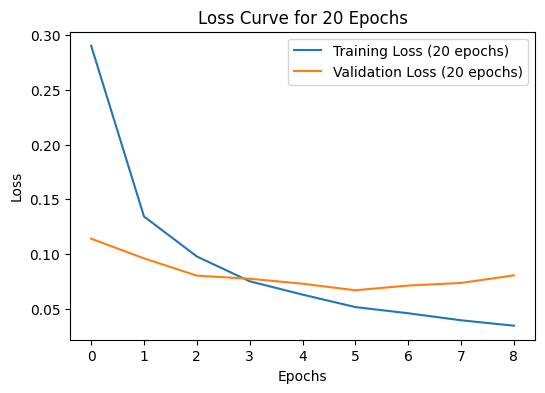

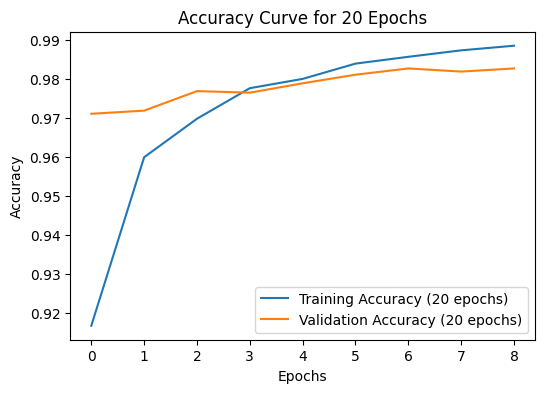

In [ ]:
# Function to create a fresh model
def create_model():
        # 3) Build Model
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.1),   # prevent overfitting
        keras.layers.Dense(10, activation="softmax")
    ])

    # 4) Compile Model
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

indices = [5, 10, 20]

for i in indices:
      # 5) Train with Validation Set
    callbacks = [
        keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]
    model = create_model()  # fresh model for each iteration
    history = model.fit(
        x_tr, y_tr,
        epochs=i,
        batch_size=32,
        validation_data=(x_val, y_val),
        callbacks=callbacks,
        verbose=1
    )
    # --- Plot Loss ---
    plt.figure(figsize=(6,4))
    plt.plot(history.history['loss'], label=f'Training Loss ({i} epochs)')
    plt.plot(history.history['val_loss'], label=f'Validation Loss ({i} epochs)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss Curve for {i} Epochs')
    plt.legend()
    plt.show()

    # --- Plot Accuracy ---
    plt.figure(figsize=(6,4))
    plt.plot(history.history['accuracy'], label=f'Training Accuracy ({i} epochs)')
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy ({i} epochs)')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy Curve for {i} Epochs')
    plt.legend()
    plt.show()


### **Task 4 — EarlyStopping Behavior Analysis**
Enable EarlyStopping with:
```python
keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
```
Analyze:

1. At which epoch did training stop?  
2. Why does the validation loss control this decision?  
3. What happens if you increase patience (e.g., to 5)?  
4. Would a different optimizer (e.g., SGD) change the EarlyStopping pattern?  
5. Explain how EarlyStopping acts as an indirect form of regularization.

In [ ]:
# What happens if you increase patience (e.g., to 5)?

# 3) Build Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
]

history1 = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8591 - loss: 0.4886 - val_accuracy: 0.9684 - val_loss: 0.1138
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9576 - loss: 0.1434 - val_accuracy: 0.9738 - val_loss: 0.0906
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9700 - loss: 0.0995 - val_accuracy: 0.9806 - val_loss: 0.0761
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9775 - loss: 0.0723 - val_accuracy: 0.9794 - val_loss: 0.0684
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9803 - loss: 0.0606 - val_accuracy: 0.9764 - val_loss: 0.0740
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9837 - loss: 0.0513 - val_accuracy: 0.9780 - val_loss: 0.0761
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9859 - loss: 0.0439 - val_accuracy: 0.9824 - val_loss: 0.0640
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9873 - loss: 0.0363 

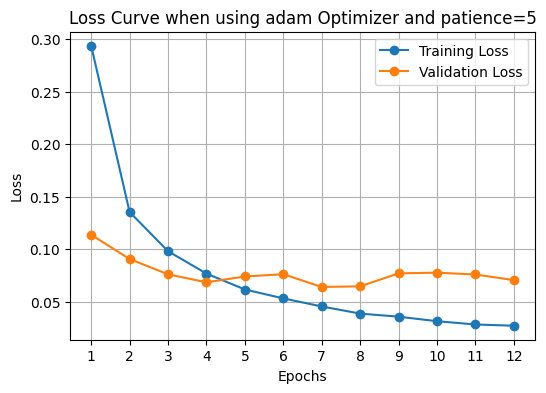

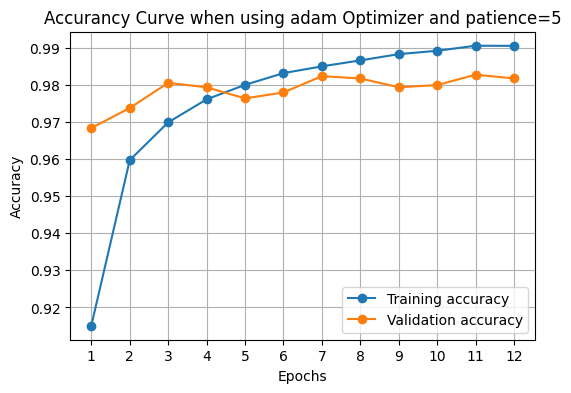

In [ ]:
epochs = range(1, len(history1.history['loss']) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, history1.history['loss'], marker='o', label='Training Loss')
plt.plot(epochs, history1.history['val_loss'], marker='o', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve when using adam Optimizer and patience=5')
plt.xticks(epochs)  # show all epoch numbers on x-axis
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(epochs, history1.history['accuracy'], marker='o', label='Training accuracy')
plt.plot(epochs, history1.history['val_accuracy'], marker='o', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accurancy Curve when using adam Optimizer and patience=5')
plt.xticks(epochs)  # show all epoch numbers on x-axis
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7107 - loss: 1.0802 - val_accuracy: 0.9220 - val_loss: 0.3084
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8915 - loss: 0.3909 - val_accuracy: 0.9350 - val_loss: 0.2462
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9099 - loss: 0.3198 - val_accuracy: 0.9416 - val_loss: 0.2177
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9160 - loss: 0.2945 - val_accuracy: 0.9458 - val_loss: 0.1947
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9252 - loss: 0.2621 - val_accuracy: 0.9526 - val_loss: 0.1791
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9319 - loss: 0.2426 - val_accuracy: 0.9564 - val_loss: 0.1677
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9352 - loss: 0.2229 - val_accuracy: 0.9610 - val_loss: 0.1560
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9409 - loss: 0.2078 - 

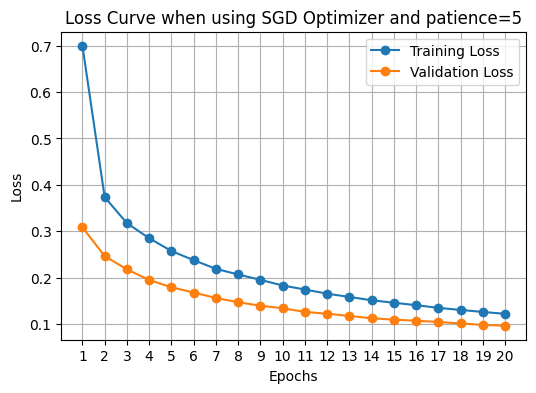

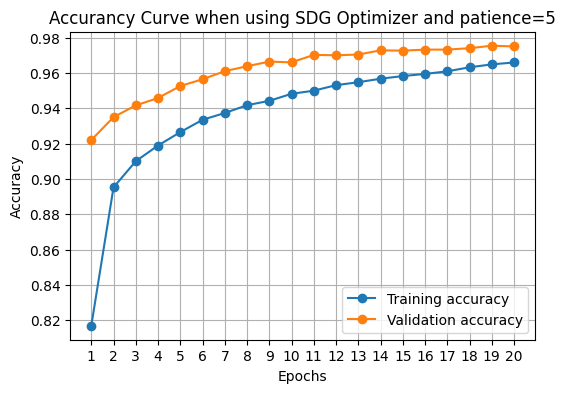

In [ ]:
# Would a different optimizer (e.g., SGD) change the EarlyStopping pattern?
# 3) Build Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="SGD",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
]

history1 = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

epochs = range(1, len(history1.history['loss']) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, history1.history['loss'], marker='o', label='Training Loss')
plt.plot(epochs, history1.history['val_loss'], marker='o', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve when using SGD Optimizer and patience=5')
plt.xticks(epochs)  # show all epoch numbers on x-axis
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(epochs, history1.history['accuracy'], marker='o', label='Training accuracy')
plt.plot(epochs, history1.history['val_accuracy'], marker='o', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accurancy Curve when using SDG Optimizer and patience=5')
plt.xticks(epochs)  # show all epoch numbers on x-axis
plt.legend()
plt.grid(True)
plt.show()



---

## Part 2 — Regularization & Optimization Mastery

### **Task 5 — Dropout Ablation Study**
Modify the model to test three configurations:
- No Dropout  
- Dropout = 0.1  
- Dropout = 0.3

For each configuration:
1. Train the model.  
2. Plot training vs. validation loss.  
3. Compare overfitting levels.  
4. Explain how Dropout encourages robust representations by preventing neuron co-adaptation.

---

### **Task 6 — L2 Regularization Experiment**
Add L2 regularization:
```python
kernel_regularizer=keras.regularizers.l2(0.001)
```
Test values:
- 0.0001  
- 0.001  
- 0.01

Analyze:
- How L2 reduces weight magnitude.  
- Why smaller weights often improve generalization.  
- How L2 changes the validation loss trend.

---

### **Task 7 — Optimizer Comparison Challenge**
Train four models using identical architecture but different optimizers:
- SGD (learning_rate=0.01)  
- SGD with Momentum  
- Adam  
- AdamW

For each optimizer:
1. Plot loss and accuracy curves.  
2. Compare convergence speed and stability.  
3. Discuss how each optimizer navigates the loss landscape differently.  
4. Explain why Adam often outperforms classical optimizers.

---

### **Task 8 — Batch Size & Gradient Noise Experiment**
Train the model with batch sizes:
- 8  
- 32  
- 128

Discuss:
- Why smaller batches introduce gradient noise.  
- When this noise is beneficial (escaping local minima).  
- Why larger batches may converge faster but generalize worse.  
- How batch size affects the smoothness of loss curves.

---

### **Task 9 — Activation Function Swap (ReLU vs Tanh vs GELU)**
Modify the model by replacing ReLU with:
- Tanh  
- Softsign  
- GELU

Analyze:
- How each activation affects gradient flow.  
- Which activations risk vanishing gradients.  
- Why GELU performs well in Transformer architectures.  
- Why ReLU remains preferred for many MLP and CNN models.

---

### **Task 10 — Weight Inspection & Model Capacity Analysis**
Extract weights from the first Dense layer:
```python
w, b = model.layers[1].get_weights()
print(w.shape)
```
Reflect on:
- Why the number of parameters is so large.  
- How high model capacity increases overfitting risk.  
- How techniques like Dropout, L2, and EarlyStopping each mitigate this risk differently.

---


This full task set is designed to build a deep understanding of neural networks, optimization, and regularization—bridging theory with hands-on experimentation in a structured, progress

## Part 2 — Regularization & Optimization Mastery

### **Task 5 — Dropout Ablation Study**
Modify the model to test three configurations:
- No Dropout  
- Dropout = 0.1  
- Dropout = 0.3

For each configuration:
1. Train the model.  
2. Plot training vs. validation loss.  
3. Compare overfitting levels.  
4. Explain how Dropout encourages robust representations by preventing neuron co-adaptation.


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

def build_and_train_model(dropout_rate):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    callbacks = [
        keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
    ]

    history = model.fit(
        x_tr, y_tr,
        epochs=20,
        batch_size=32,
        validation_data=(x_val, y_val),
        callbacks=callbacks,
        verbose=0
    )

    return history


In [ ]:
hist_no_dropout = build_and_train_model(0.0)
hist_dropout_01 = build_and_train_model(0.1)
hist_dropout_03 = build_and_train_model(0.3)

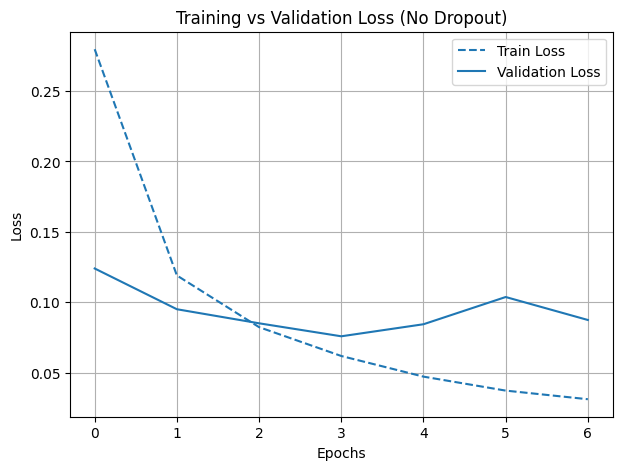

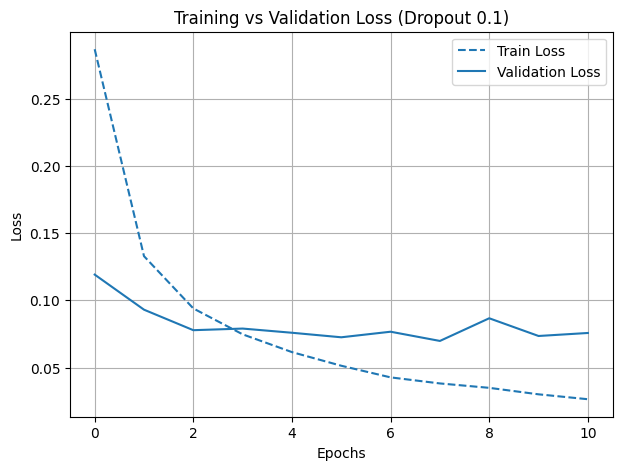

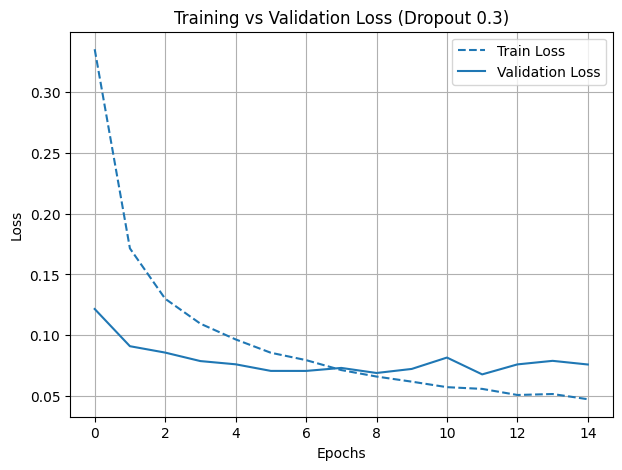

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_loss_separate(histories, labels):
    for history, label in zip(histories, labels):
        plt.figure(figsize=(7,5))

        # Training loss
        line_train, = plt.plot(
            history.history["loss"],
            linestyle="--",
            label="Train Loss"
        )

        # Validation loss (same color)
        plt.plot(
            history.history["val_loss"],
            linestyle="-",
            color=line_train.get_color(),
            label="Validation Loss"
        )

        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Training vs Validation Loss ({label})")
        plt.legend()
        plt.grid(True)
        plt.show()
plot_loss_separate(
    [hist_no_dropout, hist_dropout_01, hist_dropout_03],
    ["No Dropout", "Dropout 0.1", "Dropout 0.3"]
)


In [ ]:
def create_final_loss_table(histories, labels):
    data = []

    for history, label in zip(histories, labels):
        final_train_loss = history.history["loss"][-1]
        final_val_loss = history.history["val_loss"][-1]

        data.append({
            "Model": label,
            "Final Train Loss": round(final_train_loss, 4),
            "Final Validation Loss": round(final_val_loss, 4),
            "Gap (Overfitting Indicator)": round(final_val_loss - final_train_loss, 4)
        })

    return pd.DataFrame(data)

loss_table = create_final_loss_table(
    [hist_no_dropout, hist_dropout_01, hist_dropout_03],
    ["No Dropout", "Dropout 0.1", "Dropout 0.3"]
)

loss_table


,Model,Final Train Loss,Final Validation Loss,Gap (Overfitting Indicator)
0,No Dropout,0.0312,0.0875,0.0563
1,Dropout 0.1,0.0265,0.0757,0.0492
2,Dropout 0.3,0.0475,0.0760,0.0285


### **Task 6 — L2 Regularization Experiment**
Add L2 regularization:
```python
kernel_regularizer=keras.regularizers.l2(0.001)
```
Test values:
- 0.0001  
- 0.001  
- 0.01

Analyze:
- How L2 reduces weight magnitude.  
- Why smaller weights often improve generalization.  
- How L2 changes the validation loss trend.


Training with L2 lambda = 0.0001


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with L2 lambda = 0.001
Training with L2 lambda = 0.01


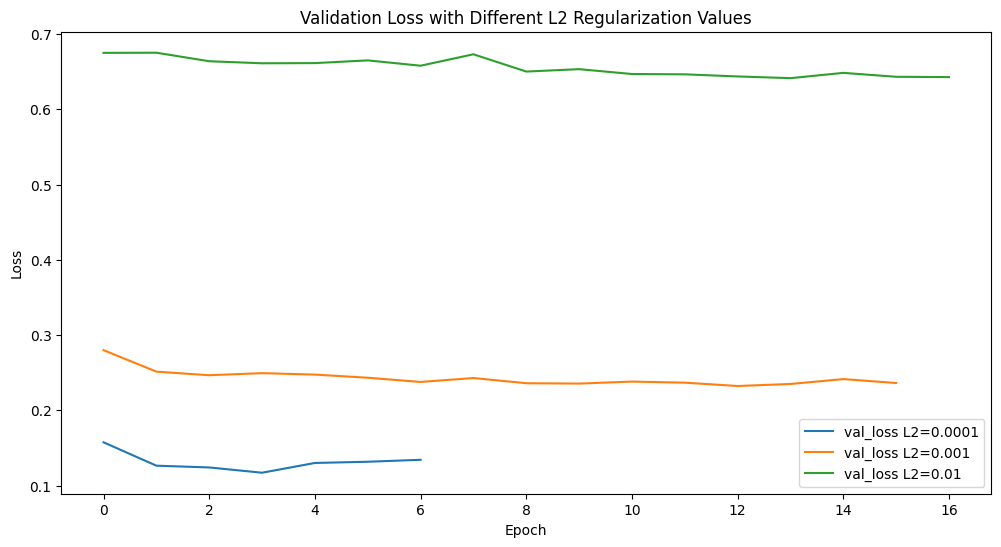

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Define L2 regularization experiment
l2_values = [0.0001, 0.001, 0.01]

def build_and_train_model_l2(l2_lambda):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(
            128,
            activation="relu",
            kernel_regularizer=keras.regularizers.l2(l2_lambda)  # L2 regularization
        ),
        keras.layers.Dense(
            10,
            activation="softmax",
            kernel_regularizer=keras.regularizers.l2(l2_lambda)  # L2 on output layer too
        )
    ])

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    callbacks = [
        keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
    ]

    history = model.fit(
        x_tr, y_tr,
        epochs=20,
        batch_size=32,
        validation_data=(x_val, y_val),
        callbacks=callbacks,
        verbose=0
    )

    return history

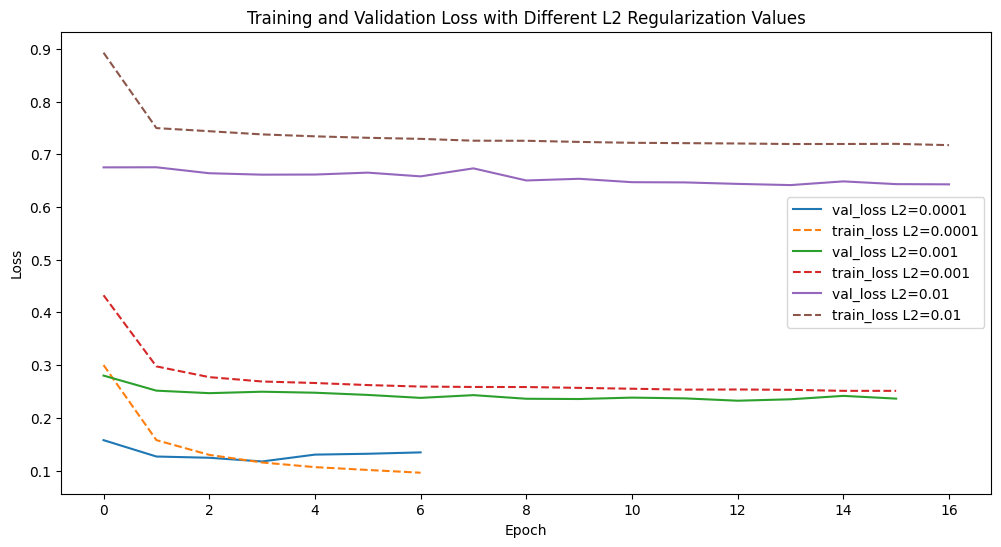

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
for l2_val, history in histories.items():
    # Validation loss - solid line
    plt.plot(history.history['val_loss'], label=f'val_loss L2={l2_val}')
    # Training loss - dashed line
    plt.plot(history.history['loss'], '--', label=f'train_loss L2={l2_val}')

plt.title("Training and Validation Loss with Different L2 Regularization Values")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


### **Task 7 — Optimizer Comparison Challenge**
Train four models using identical architecture but different optimizers:
- SGD (learning_rate=0.01)  
- SGD with Momentum  
- Adam  
- AdamW

For each optimizer:
1. Plot loss and accuracy curves.  
2. Compare convergence speed and stability.  
3. Discuss how each optimizer navigates the loss landscape differently.  
4. Explain why Adam often outperforms classical optimizers.


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

def build_model(optimizer):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.1),  # prevent overfitting
        keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


In [ ]:
optimizers = {
    "SGD": keras.optimizers.SGD(learning_rate=0.01),
    "SGD + Momentum": keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "Adam": keras.optimizers.Adam(),
    "AdamW": keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4)
}


In [ ]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

histories = {}

for name, opt in optimizers.items():
    print(f"\nTraining with {name} optimizer")
    model = build_model(opt)
    histories[name] = model.fit(
        x_tr, y_tr,
        epochs=20,
        batch_size=32,
        validation_data=(x_val, y_val),
        callbacks=callbacks,
        verbose=2
    )



Training with SGD optimizer
Epoch 1/20
1719/1719 - 7s - 4ms/step - accuracy: 0.8093 - loss: 0.7116 - val_accuracy: 0.9202 - val_loss: 0.3158
Epoch 2/20
1719/1719 - 4s - 2ms/step - accuracy: 0.8944 - loss: 0.3777 - val_accuracy: 0.9304 - val_loss: 0.2513
Epoch 3/20
1719/1719 - 4s - 2ms/step - accuracy: 0.9094 - loss: 0.3198 - val_accuracy: 0.9392 - val_loss: 0.2188
Epoch 4/20
1719/1719 - 4s - 2ms/step - accuracy: 0.9193 - loss: 0.2854 - val_accuracy: 0.9446 - val_loss: 0.1988
Epoch 5/20
1719/1719 - 4s - 2ms/step - accuracy: 0.9273 - loss: 0.2594 - val_accuracy: 0.9524 - val_loss: 0.1815
Epoch 6/20
1719/1719 - 4s - 2ms/step - accuracy: 0.9328 - loss: 0.2397 - val_accuracy: 0.9546 - val_loss: 0.1677
Epoch 7/20
1719/1719 - 4s - 2ms/step - accuracy: 0.9374 - loss: 0.2213 - val_accuracy: 0.9580 - val_loss: 0.1574
Epoch 8/20
1719/1719 - 4s - 2ms/step - accuracy: 0.9411 - loss: 0.2079 - val_accuracy: 0.9606 - val_loss: 0.1474
Epoch 9/20
1719/1719 - 4s - 2ms/step - accuracy: 0.9447 - loss: 0.1

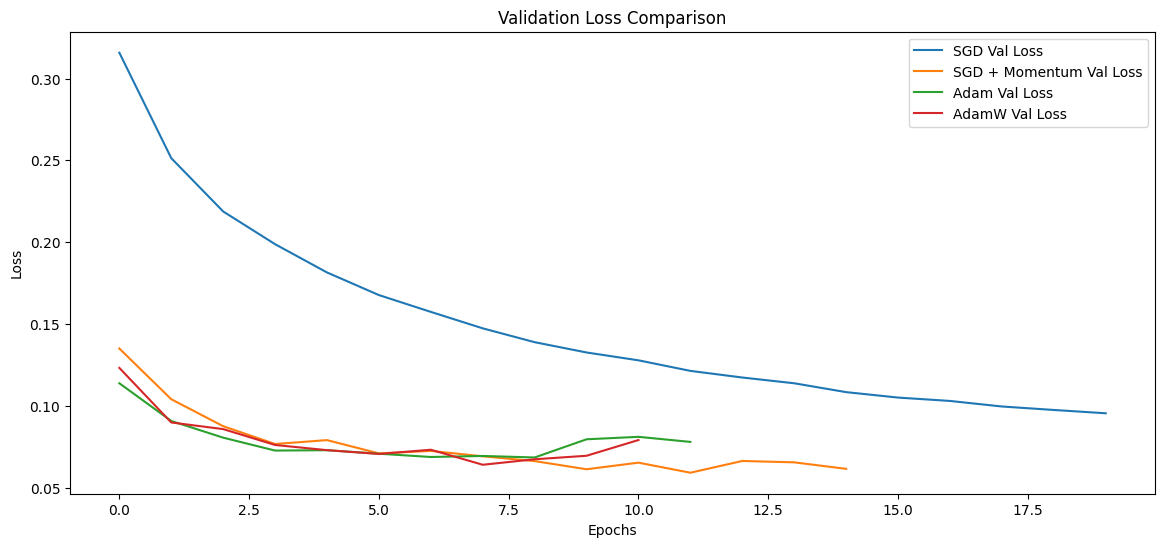

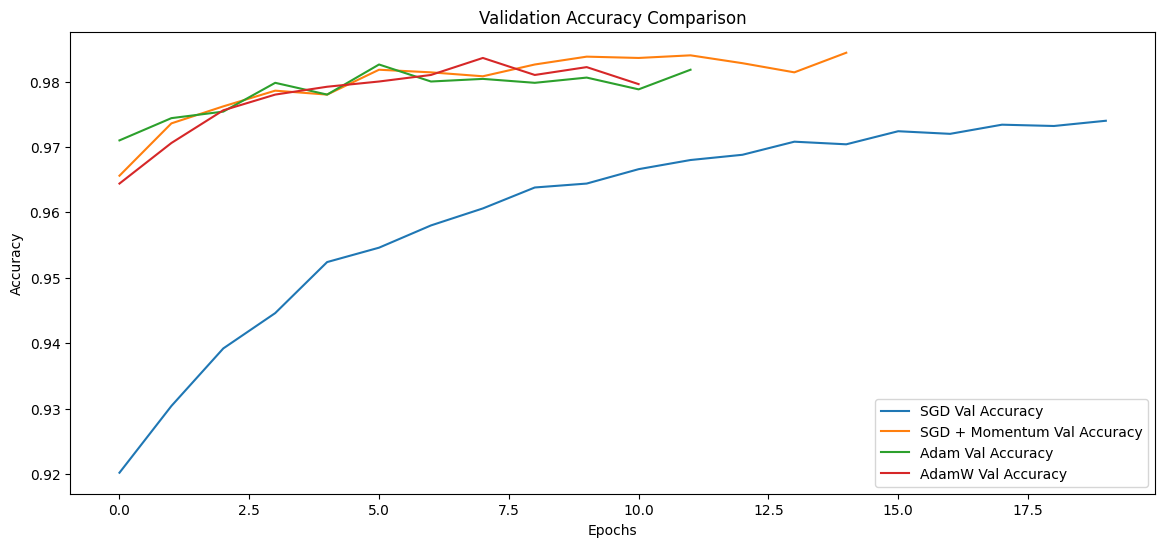

In [ ]:
plt.figure(figsize=(14,6))

for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{name} Val Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{name} Val Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### **Task 8 — Batch Size & Gradient Noise Experiment**
Train the model with batch sizes:
- 8  
- 32  
- 128

Discuss:
- Why smaller batches introduce gradient noise.  
- When this noise is beneficial (escaping local minima).  
- Why larger batches may converge faster but generalize worse.  
- How batch size affects the smoothness of loss curves.

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# -------------------------------------------------
# 1) Model builder (same architecture every time)
# -------------------------------------------------
def build_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


# -------------------------------------------------
# 2) Train with different batch sizes
# -------------------------------------------------
batch_sizes = [8, 32, 128]
histories = {}

for bs in batch_sizes:
    print(f"\nTraining with batch size = {bs}")

    model = build_model()

    callbacks = [
        keras.callbacks.EarlyStopping(
            patience=3,
            restore_best_weights=True
        )
    ]

    history = model.fit(
        x_tr, y_tr,
        epochs=20,
        batch_size=bs,
        validation_data=(x_val, y_val),
        callbacks=callbacks,
        verbose=1
    )

    histories[bs] = history


Training with batch size = 8


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8881 - loss: 0.3796 - val_accuracy: 0.9716 - val_loss: 0.1032
Epoch 2/20
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9630 - loss: 0.1177 - val_accuracy: 0.9752 - val_loss: 0.0897
Epoch 3/20
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9738 - loss: 0.0823 - val_accuracy: 0.9758 - val_loss: 0.0860
Epoch 4/20
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9788 - loss: 0.0678 - val_accuracy: 0.9806 - val_loss: 0.0797
Epoch 5/20
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9826 - loss: 0.0560 - val_accuracy: 0.9810 - val_loss: 0.0755
Epoch 6/20
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9841 - loss: 0.0480 - val_accuracy: 0.9800 - val_loss: 0.0790
Epoch 7/20
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9870 - loss: 0.0410 - val_accuracy: 0.9788 - val_loss: 0.0927
Epoch 8/20
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9879 - loss: 0

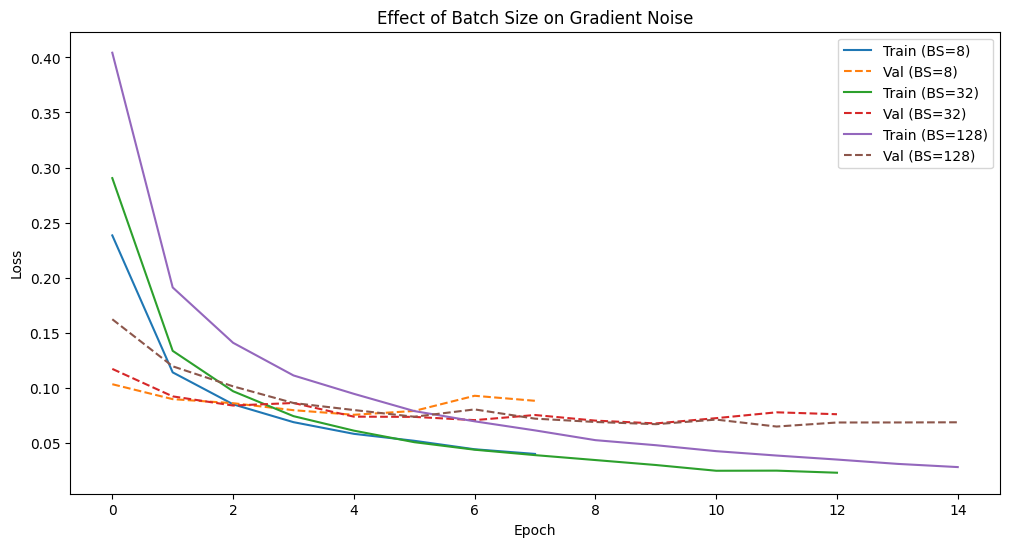

In [5]:
# -------------------------------------------------
# 3) Plot Training vs Validation Loss
# -------------------------------------------------
plt.figure(figsize=(12, 6))

for bs, history in histories.items():
    plt.plot(history.history["loss"], label=f"Train (BS={bs})")
    plt.plot(history.history["val_loss"], linestyle="--", label=f"Val (BS={bs})")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Effect of Batch Size on Gradient Noise")
plt.legend()
plt.show()


### **Task 9 — Activation Function Swap (ReLU vs Tanh vs GELU)**
Modify the model by replacing ReLU with:
- Tanh  
- Softsign  
- GELU

Analyze:
- How each activation affects gradient flow.  
- Which activations risk vanishing gradients.  
- Why GELU performs well in Transformer architectures.  
- Why ReLU remains preferred for many MLP and CNN models.

In [6]:
import tensorflow as tf
from tensorflow import keras

activations = ["relu", "tanh", "softsign", "gelu"]
histories = {}

def build_model(activation):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=activation),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

callbacks = [
    keras.callbacks.EarlyStopping(
        patience=3,
        restore_best_weights=True
    )
]

for act in activations:
    print(f"\nTraining with activation: {act.upper()}")
    model = build_model(act)

    history = model.fit(
        x_tr, y_tr,
        epochs=20,
        batch_size=32,
        validation_data=(x_val, y_val),
        callbacks=callbacks,
        verbose=1
    )

    histories[act] = history

    best_epoch = len(history.history["loss"])
    best_val_acc = max(history.history["val_accuracy"])

    print(f"Best epoch: {best_epoch}")
    print(f"Best validation accuracy: {best_val_acc:.4f}")



Training with activation: RELU
Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8596 - loss: 0.4809 - val_accuracy: 0.9660 - val_loss: 0.1192
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9588 - loss: 0.1407 - val_accuracy: 0.9730 - val_loss: 0.0891
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9730 - loss: 0.0939 - val_accuracy: 0.9758 - val_loss: 0.0838
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9769 - loss: 0.0745 - val_accuracy: 0.9770 - val_loss: 0.0782
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9806 - loss: 0.0608 - val_accuracy: 0.9792 - val_loss: 0.0753
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9850 - loss: 0.0494 - val_accuracy: 0.9810 - val_loss: 0.0733
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9865 - loss: 0.0405 - val_accuracy: 0.9816 - val_loss: 0.0671
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - ac

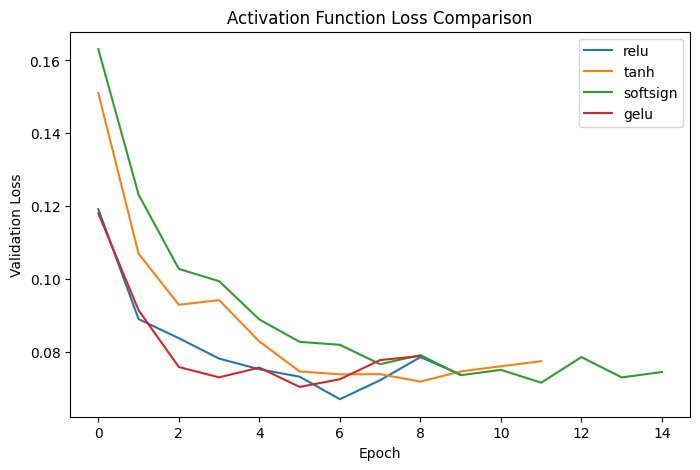

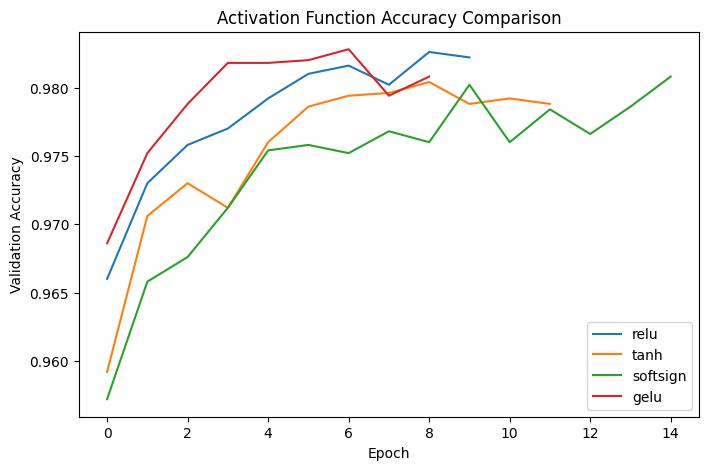

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
for act, history in histories.items():
    plt.plot(history.history["val_loss"], label=act)

plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Activation Function Loss Comparison")
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
for act, history in histories.items():
    plt.plot(history.history["val_accuracy"], label=act)

plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Activation Function Accuracy Comparison")
plt.legend()
plt.show()



### **Task 10 — Weight Inspection & Model Capacity Analysis**
Extract weights from the first Dense layer:
```python
w, b = model.layers[1].get_weights()
print(w.shape)
```
Reflect on:
- Why the number of parameters is so large.  
- How high model capacity increases overfitting risk.  
- How techniques like Dropout, L2, and EarlyStopping each mitigate this risk differently.


In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history1 = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8618 - loss: 0.4819 - val_accuracy: 0.9672 - val_loss: 0.1174
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9571 - loss: 0.1445 - val_accuracy: 0.9716 - val_loss: 0.0968
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9706 - loss: 0.0991 - val_accuracy: 0.9750 - val_loss: 0.0823
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9764 - loss: 0.0759 - val_accuracy: 0.9792 - val_loss: 0.0760
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9816 - loss: 0.0601 - val_accuracy: 0.9804 - val_loss: 0.0727
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9843 - loss: 0.0494 - val_accuracy: 0.9770 - val_loss: 0.0849
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9860 - loss: 0.0435 - val_accuracy: 0.9808 - val_loss: 0.0690
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9885 - loss: 0.0353 - 

In [12]:
# Extract weights from the first Dense layer
w, b = model.layers[1].get_weights()

# Inspect shape of weights
print("Weights shape:", w.shape)
print("Bias shape:", b.shape)


Weights shape: (784, 128)
Bias shape: (128,)


---

---

---
# Submission Guide

This guide explains **exactly how you must submit your work on GitHub** for the Deep Learning & Neural Networks notebook. It is short, clear, and professional.

---

## 1. What You Must Submit
Upload the following to your GitHub repository:

```
notebook.ipynb          # Your completed notebook
submission/             # Your task answers (as Markdown files)
results/                # Plots, prediction images, optimizer curves
README.md               # Your project overview
```

Make sure all code runs **without errors**.

---

## 2. Repository Structure (Required)
```
project/
├── notebook.ipynb
├── README.md
├── results/
│   ├── predictions/
│   ├── loss_curves/
│   └── optimizer_tests/
└── submission/
    ├── Task01_PredictionAnalysis.md
    ├── Task02_CustomDigit.md
    ├── Task03_Epochs.md
    ├── Task04_EarlyStopping.md
    ├── Task05_Dropout.md
    ├── Task06_L2.md
    ├── Task07_Optimizers.md
    ├── Task08_BatchSize.md
    ├── Task09_Activations.md
    └── Task10_Weights.md
```

---

## 3. How to Write Each Task (Simple Template)
Each task must follow this format:

### **Task Title**
Example: *Task 01 — Prediction Analysis*

### **1. Objective**
One or two sentences explaining the goal.

### **2. Code Used**
Short snippet showing what you ran.

### **3. Results**
- Prediction output
- Plots or curves (if required)

### **4. Short Analysis**
Explain **why** the model behaved this way.
Mention concepts like:
- activations
- optimizer behavior
- overfitting / generalization
- regularization effects

### **5. Key Takeaway**
One clear sentence showing what you learned.

---

## 4. README Checklist
Your `README.md` must include:
- Project overview
- Short description of the three notebook sections
- How to run the notebook
- Samples of results (images/plots)

Keep it brief and clean.

---

## Final Notes
To receive full credit:
- Your repo must be **organized**, **clear**, and **professional**.
- All results and plots must be saved inside the `results/` folder.
- Each task must be written using the short template above.
- Your notebook must run from top to bottom with no errors.

Good luck, and make your GitHub submission shine!